# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
# Your code here! :)

# A Peak in The Data
Df = pd.read_csv("GermanCredit.csv")
Df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
Columns = Df.columns.array
#Columns

In [4]:
# Finding the Y Column

Df['Class'].describe()

count     1000
unique       2
top       Good
freq       700
Name: Class, dtype: object

In [5]:
# Getting X and Y
Y = Df['Class'].array
#print(Y)
Y = [1 if y == 'Good'  else 0 for y in Y]
#print(Y)

In [6]:
X = Df.drop('Class', axis=1)
X.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [7]:
#X.columns

In [8]:
# Creating The Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=258)

# Designing the CLassfier
clf = DecisionTreeClassifier(max_depth=4, random_state=256)

# Fitting the Model
clf.fit(X_train,y_train)

# Getting Score
y_pred = clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.72


In [9]:
# Making a general Method to get the Score of any Model

init_random_state = 20
init_test_size = 0.35


def getCLassfierScore(clf, test_size=init_test_size, validation_size= 0.85):
    # Creating The Train and Test Data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=init_random_state)

    # Fitting the Model
    clf.fit(X_train,y_train)

    # Getting Score
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=validation_size, random_state=init_random_state)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    print(clf.__class__.__name__, score)
    return score

In [10]:
def getTop10byValue(_dict):
    return sorted(_dict.items(), key =lambda kv:(kv[1], kv[0]))[-10:-1]

In [11]:
#Testing the Method

clf = DecisionTreeClassifier(max_depth=4, random_state=256)

getCLassfierScore(clf, 0.33)

DecisionTreeClassifier 0.76


0.76

In [12]:
Dtree_Clf = DecisionTreeClassifier()

param_grid = { 
    'max_depth': [3,15],
    'min_samples_split': [2,6],
    'min_samples_leaf':[20,100],
    'max_features':['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=Dtree_Clf, param_grid=param_grid)

CV_rfc.fit(X, Y)
best_Params = CV_rfc.best_params_
best_Params

{'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 20,
 'min_samples_split': 6}

In [13]:
getCLassfierScore(DecisionTreeClassifier(max_depth=best_Params['max_depth'],
                                                       max_features = best_Params['max_features'],
                                                       min_samples_leaf = best_Params['min_samples_leaf'],
                                                       min_samples_split = best_Params['min_samples_split']))

DecisionTreeClassifier 0.6976470588235294


0.6976470588235294

In [14]:
# Best Model 
best_clf = DecisionTreeClassifier(max_depth=best_Params['max_depth'],
                                                       max_features = best_Params['max_features'],
                                                       min_samples_leaf = best_Params['min_samples_leaf'],
                                                       min_samples_split = best_Params['min_samples_split'])

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [15]:
#! pip install dtreeviz

In [16]:
#!conda install python-graphviz

In [17]:
best_clf.fit(X,Y)

DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=20,
                       min_samples_split=6)

In [18]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(best_clf, out_file=None)
#import pdb pdb.set_trace()
graph = graphviz.Source(dot_data)

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(best_clf,
               out_file="BestDecisionTreeClassifier.dot",
               feature_names=X.columns,
               class_names="Class",
               rounded=True,
               filled=True)

In [20]:
# To get the Image from dot to png or pdf follow below steps.
# 1. Go to the the folder location of the .dot file, by default it has the same parent as the running notebook
# 2. "dot -Tpng BestDecisionTreeClassifier.dot -o BestDecisionTreeClassifier[.png/.pdf]" run it in terminal.

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

# Visualization

from dtreeviz.trees import *
viz2 = dtreeviz(best_clf,
               X_train,
               y_train,
               target_name='Class',
               feature_names=X.columns.to_list(),
              class_names=[0,1])
#viz2.view()
display(HTML(viz2.svg()))

regr = tree.DecisionTreeRegressor(max_depth=2)
regr.fit(XArray, YArray)

viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='Class',
               feature_names=X.columns.to_list())
              
#viz.view()

In [21]:
import warnings
warnings.filterwarnings('ignore')

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [23]:
rnd_clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'n_estimators':[50,100],
    'max_depth': [3,15],
    'min_samples_split': [2,6],
    'min_samples_leaf':[20,100],
    'max_features':['auto', 'sqrt', 'log2'],
    'warm_start':[True,False],
    'class_weight':['balanced', 'balanced_subsample']
}

CV_rfc = GridSearchCV(estimator=rnd_clf, param_grid=param_grid)

CV_rfc.fit(X, Y)
best_rnd = CV_rfc.best_params_
best_rnd

{'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'n_estimators': 100,
 'warm_start': True}

In [24]:
best_rnd_clf = RandomForestClassifier(n_estimators=best_rnd['n_estimators'],
                       max_depth=best_rnd['max_depth'],
                       min_samples_split=best_rnd['min_samples_split'],
                       min_samples_leaf=best_rnd['min_samples_leaf'],
                       max_features=best_rnd['max_features'],
                       warm_start=best_rnd['warm_start'],
                       class_weight=best_rnd['class_weight'],
                       n_jobs=-1)

In [25]:
getCLassfierScore(best_rnd_clf)

RandomForestClassifier 0.7611764705882353


0.7611764705882353

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [26]:
# Feature Importance

featureDict = {}

rnd_clf.fit(X_train, y_train)
for name, score in zip(X_train.columns, best_rnd_clf.feature_importances_):
    featureDict[name] = score

In [27]:
getTop10byValue(featureDict) # What is this Score.

[('Property.RealEstate', 0.03022433033420329),
 ('EmploymentDuration.lt.1', 0.03442663938712782),
 ('SavingsAccountBonds.Unknown', 0.035234261100673715),
 ('Age', 0.046705605993274134),
 ('SavingsAccountBonds.lt.100', 0.04751672138158862),
 ('CreditHistory.Critical', 0.05096042696767997),
 ('CheckingAccountStatus.lt.0', 0.07391281728202169),
 ('Amount', 0.0835522200833362),
 ('Duration', 0.0968512533717601)]

In [28]:
# Voting Classifiers

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=init_test_size, random_state=init_random_state)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [31]:
# Your code here! :)
rnd_clf = best_rnd_clf
log_clf = LogisticRegression()
svm_clf = SVC()


voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')

In [32]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=15,
                                                     max_features='log2',
                                                     min_samples_leaf=20,
                                                     n_jobs=-1,
                                                     warm_start=True)),
                             ('svc', SVC())])

In [33]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7228571428571429
RandomForestClassifier 0.7428571428571429
SVC 0.66
VotingClassifier 0.7285714285714285


In [34]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    getCLassfierScore(clf)

LogisticRegression 0.7658823529411765
RandomForestClassifier 0.7611764705882353
SVC 0.7105882352941176
VotingClassifier 0.7705882352941177


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [35]:
#! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html (Old)


Use this Link for updated APIs https://pdpbox.readthedocs.io/en/latest/api.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [36]:
import pdpbox
from pdpbox import pdp

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd842d982e0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd842ec3f10>})

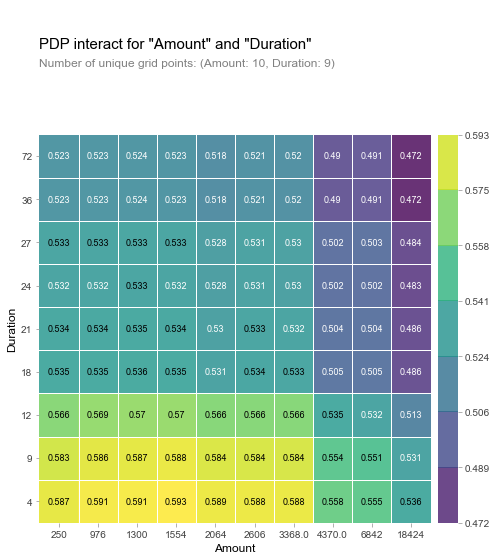

In [37]:
selected_features = ['Amount', 'Duration']
pdp_pedi_insul = pdp.pdp_interact(rnd_clf,Df,model_features=X_train.columns,features=selected_features)
pdp.pdp_interact_plot(pdp_pedi_insul, selected_features, plot_type='grid')

In [38]:
# Bagging and Pasting

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(best_clf, n_estimators=500, max_samples=100,bootstrap=True,n_jobs=-1)

In [39]:
getCLassfierScore(bag_clf)

BaggingClassifier 0.7035294117647058


0.7035294117647058

In [40]:
bag_clf.fit(X_train, y_train)
bag_clf.score(X, Y)

0.7

In [41]:
# Manual Boosting

tree1 = best_clf
tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=20,
                       min_samples_split=6)

In [42]:
Y2 = y_train - tree1.predict(X_train)
tree2 = best_clf
tree2.fit(X_train,Y2)

DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=20,
                       min_samples_split=6)

In [43]:
Y3 = Y2 - tree1.predict(X_train)
tree3 = best_clf
tree3.fit(X_train,Y3)

DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=20,
                       min_samples_split=6)

In [44]:
y_pred = sum(tree.predict(X_test) for tree in (tree1,tree2,tree3))
accuracy_score(y_test, y_pred)

0.32

## Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

In [45]:
# Gradient Boost

from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=7, n_estimators=30,learning_rate=1.0)

getCLassfierScore(gbrt)

GradientBoostingClassifier 0.8776470588235294


0.8776470588235294

In [46]:
# Gradient boost with best number of estimators

import numpy as np
from sklearn.metrics import mean_squared_error

errors = [mean_squared_error(y_test,y_pred) for y_pred in gbrt.staged_predict(X_test)]
#print("Errors", errors)
best_n_estimators = np.argmin(errors) + 1
print("best_n_estimators", best_n_estimators)
best_gbrt = GradientBoostingClassifier(max_depth=7,
                                       n_estimators=best_n_estimators,
                                       learning_rate=1.0)

getCLassfierScore(best_gbrt)

best_n_estimators 10
GradientBoostingClassifier 0.8835294117647059


0.8835294117647059

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/ ---
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [47]:
#! conda install -c anaconda py-xgboost

In [48]:
#from xgboost import XGBClassifier

In [49]:
#! conda install -c conda-forge catboost

In [50]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

getCLassfierScore(cat_clf)

0:	learn: 0.5703874	total: 53.1ms	remaining: 53.1ms
1:	learn: 0.5218582	total: 54.2ms	remaining: 0us
CatBoostClassifier 0.7211764705882353


0.7211764705882353

In [51]:
#! conda install -c conda-forge lightgbm

In [52]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(max_depth=7,
                          n_estimators=750,
                         learning_rate=0.1)

getCLassfierScore(lgbm_clf)

LGBMClassifier 0.8776470588235294


0.8776470588235294

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)